# Day 6: Data Pre­pro­cessing - Scal­ing and Nor­m­al­isa­tion

## Task: 
- Scale and nor­m­al­ise nu­mer­ic­al fea­tures in the data­set.

## De­scrip­tion: 
- Use tech­niques like Min-Max scal­ing or Z-score nor­m­al­isation to scale nu­mer­ic­al fea­tures to a sim­il­ar range. 

In [313]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Dataset

In [314]:
df = pd.read_csv('suicide_rates_1990-2022.csv')
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


# Data Statistics

In [315]:
# Obtain dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                   

In [316]:
# .describe() to obtain the summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560.000000,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,2005.740047,63.632037,3.873690,12.299791,2.456184e+07,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,8.745003,254.095408,7.317820,21.016170,4.531156e+07,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,32.000000,4.355646,15.384615,2.533364e+07,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [317]:
# Count NaN values in each column
nan_values_count = df.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)


Count of NaN values in each column:
RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


# Missing/ NaN Values

In [318]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

# Print NaN value count once more
# Count NaN values in each column
nan_values_count = df.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)



Count of NaN values in each column:
RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64


# Scaling & Normilisation

In [319]:
# min/max scaler
# Initilise the scaler
mm_scaler = MinMaxScaler()

In [320]:
#  Z-Score scaler
# Initilise the scaler
z_scaler = StandardScaler()

In [321]:
numeric_columns = ['SuicideCount', 'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio']

# Min-max scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = pd.DataFrame(min_max_scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
min_max_scaled_data.head()

,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,0.000000,0.000000,0.000000,0.009779,0.000028,0.001502,0.000038,0.0114,0.049865,0.517779
1,0.000000,0.000000,0.000000,0.009779,0.000028,0.001502,0.000038,0.0114,0.049865,0.517779
2,0.000000,0.000000,0.000000,0.009779,0.000028,0.001502,0.000038,0.0114,0.049865,0.517779
3,0.000000,0.000000,0.000000,0.009779,0.000028,0.001502,0.000038,0.0114,0.049865,0.517779
4,0.000737,0.034014,0.007027,0.009779,0.000028,0.001502,0.000038,0.0114,0.049865,0.517779


In [322]:
# Z-scaling
z_scaler = StandardScaler()
z_scaled_data = pd.DataFrame(z_scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
z_scaled_data.head()

,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,-0.249906,-0.517075,-0.549909,-0.451541,-0.285054,-0.841972,-0.280333,-0.963224,1.360972,-0.289162
1,-0.249906,-0.517075,-0.549909,-0.451541,-0.285054,-0.841972,-0.280333,-0.963224,1.360972,-0.289162
2,-0.249906,-0.517075,-0.549909,-0.451541,-0.285054,-0.841972,-0.280333,-0.963224,1.360972,-0.289162
3,-0.249906,-0.517075,-0.549909,-0.451541,-0.285054,-0.841972,-0.280333,-0.963224,1.360972,-0.289162
4,-0.230192,-0.046007,-0.376436,-0.451541,-0.285054,-0.841972,-0.280333,-0.963224,1.360972,-0.289162


# Data Visualisation

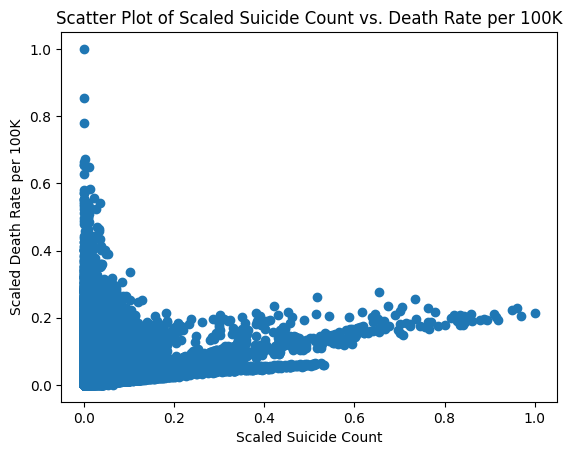

In [323]:
import matplotlib.pyplot as plt

plt.scatter(min_max_scaled_data['SuicideCount'], min_max_scaled_data['DeathRatePer100K'])
plt.xlabel('Scaled Suicide Count')
plt.ylabel('Scaled Death Rate per 100K')
plt.title('Scatter Plot of Scaled Suicide Count vs. Death Rate per 100K')
plt.show()

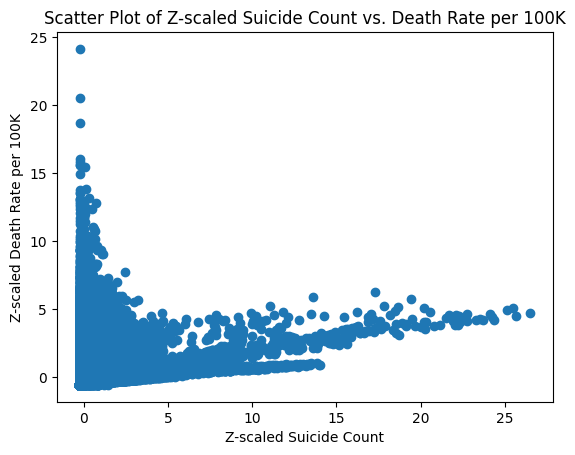

In [324]:
import matplotlib.pyplot as plt

plt.scatter(z_scaled_data['SuicideCount'], z_scaled_data['DeathRatePer100K'])
plt.xlabel('Z-scaled Suicide Count')
plt.ylabel('Z-scaled Death Rate per 100K')
plt.title('Scatter Plot of Z-scaled Suicide Count vs. Death Rate per 100K')
plt.show()